In [1]:
from dwave.system import DWaveSampler, EmbeddingComposite

import networkx as nx
import matplotlib.pyplot as plt

In [2]:
G = nx.petersen_graph()

A = 2
B = 1

In [40]:
def solve_vertex_cover_qubo(graph, ws = None):
    vertices = list(set(v for edge in graph for v in edge))
    if not ws:
        ws = [1 for _ in vertices]
    
    linear = {(vertices[i], vertices[i]): ws[i] * B for i, _ in enumerate(vertices)}
    print(linear)
    for i,j in graph:
        linear[(i, i)] -= A
        linear[(j, j)] -= A

    quadratic = {(j[0], j[1]): A for _, j in enumerate(graph)}

    Q = dict(linear)
    Q.update(quadratic)

    print(Q)

    sampler = EmbeddingComposite(DWaveSampler())
    
    solution = sampler.sample_qubo(Q, num_reads=5000, label='test_petersen_graph_qubo')
    return solution

In [41]:
qubo_samples = solve_vertex_cover_qubo(G.edges)
print(qubo_samples)
best_solution = qubo_samples.lowest().first.sample
print(best_solution)
min_vertex_cover_qubo = [i for (i, j) in best_solution.items() if j == 1]
print(min_vertex_cover_qubo)

{(0, 0): 1, (1, 1): 1, (2, 2): 1, (3, 3): 1, (4, 4): 1, (5, 5): 1, (6, 6): 1, (7, 7): 1, (8, 8): 1, (9, 9): 1}
{(0, 0): -5, (1, 1): -5, (2, 2): -5, (3, 3): -5, (4, 4): -5, (5, 5): -5, (6, 6): -5, (7, 7): -5, (8, 8): -5, (9, 9): -5, (0, 1): 2, (0, 4): 2, (0, 5): 2, (1, 2): 2, (1, 6): 2, (2, 3): 2, (2, 7): 2, (3, 4): 2, (3, 8): 2, (4, 9): 2, (5, 7): 2, (5, 8): 2, (6, 8): 2, (6, 9): 2, (7, 9): 2}
    0  1  2  3  4  5  6  7  8  9 energy num_oc. chain_.
0   0  1  1  0  1  1  0  0  1  1  -24.0     964     0.0
1   1  0  1  0  1  0  1  1  1  0  -24.0    1111     0.0
2   1  0  1  1  0  1  1  0  0  1  -24.0     936     0.0
3   0  1  0  1  1  1  1  1  0  0  -24.0    1050     0.0
4   1  1  0  1  0  0  0  1  1  1  -24.0     930     0.0
5   1  0  1  0  1  0  1  1  1  1  -23.0       1     0.0
6   1  1  0  1  1  0  0  1  1  1  -23.0       1     0.0
7   1  0  1  1  1  0  1  1  1  0  -23.0       1     0.0
8   1  1  0  1  0  1  1  1  0  1  -23.0       1     0.0
9   1  1  0  1  0  1  0  1  1  1  -23.0    

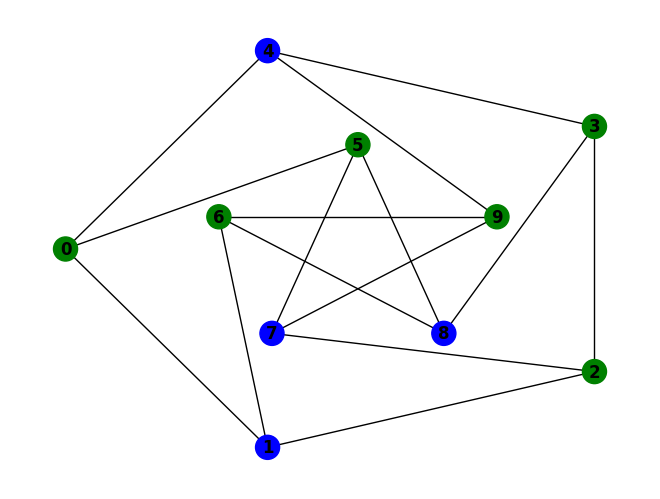

In [21]:
color_map = list(range(0,10))
for node in G:
    if node in min_vertex_cover_qubo:
        color_map[node]='green'
    else: 
        color_map[node]= 'blue'      
nx.draw_shell(G, node_color=color_map, nlist=[range(5, 10), range(5)], with_labels=True, font_weight='bold')
plt.show()